# Facebook Data

# Group 18
- Gital Halal
- Elizaveta Slobina
- Moriya Mann
- Tzlil Mines

In [3]:
from IPython.core.display import Image
Image(url= "https://github.com/GitalLizaMoriyaTzlil/Facebook_Data/raw/main/tiny-business-people-with-smartphones-tablet-get-like-notifications-likes-addiction-thumbs-up-dependence-social-media-madness-concept-bright-vibrant-violet-isolated-illustration_335657-102.jpg", width=900,height=300)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## contents:
1. [The Dataset:](#section1)
2. [Arranging the data:](#section2)
3. [Presenting data and conclusions:](#section3)


<a id='section1'></a>
### The Dataset:
 This dataset contains information about Facebook users.
 Among others, We can see the age of users, the number of likes the user received and the number of likes he made, and even the number of days since the account was opened.
 This dataset contains 99903 entries with 15 columns.
 [link to the data source](https://www.kaggle.com/code/sumitupadhye12/facebook-data-eda/data) 

We read the data from a github repository:

In [5]:
url = 'https://github.com/GitalLizaMoriyaTzlil/Facebook_Data/raw/main/pseudo_facebook.csv'
Facebook_data = pd.read_csv(url)
Facebook_data

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


Explain each column:

In [6]:
Image(url= "https://raw.githubusercontent.com/GitalLizaMoriyaTzlil/Facebook_Data/main/WhatsApp%20Image%202022-05-19%20at%2018.44.38.jpeg", width=900,height=300)

In [7]:
new_Facebook_data = Facebook_data.copy()

<a id='section2'></a>
### Arranging the data:
We chose to refer to users between the ages of 13 and 92, Because you can sign up for Facebook from the age of 13, And we assumed it was unlikely that those aged 92 and over would sign up for Facebook, Apparently these are users who faked their year of birth when registering.

In [8]:
new_Facebook_data = new_Facebook_data.loc[new_Facebook_data.age<=92]

#### Check missing values:

In [9]:
new_Facebook_data.isnull().sum().sort_values(ascending=False)

gender                   115
tenure                     1
userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

We'll fill in the missing values under category tenure at 0:

In [10]:
new_Facebook_data.tenure.fillna('0', inplace = True )

Fill in the missing values under gender category with 'another':

In [11]:
new_Facebook_data.gender.fillna('another', inplace = True )

We assumed that users who didn't fill out the gender category probably missed it when signing up or didn't define their sexuality as a man or a woman.

#### Fixing data types
 Check if any of the data types need to be fixed:

In [12]:
new_Facebook_data.dtypes

userid                    int64
age                       int64
dob_day                   int64
dob_year                  int64
dob_month                 int64
gender                   object
tenure                   object
friend_count              int64
friendships_initiated     int64
likes                     int64
likes_received            int64
mobile_likes              int64
mobile_likes_received     int64
www_likes                 int64
www_likes_received        int64
dtype: object

We'll leave them as objects for now, but might change them later, depending on what we will want to do

Converting tenure values to int:

In [13]:
new_Facebook_data.tenure=new_Facebook_data.tenure.astype('int')

Arranging ages by groups:

In [14]:
lables1 = ['13-32','33-53','53-72','73-92']
new_Facebook_data['age_group'] = pd.cut(new_Facebook_data['age'], bins = [13,33,53,73,93], labels = lables1, right=False)

Create a new column - the number of years on Facebook:

In [15]:
lables2 = ['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7 years','7-8 years','8-9 years']
new_Facebook_data['tenure_per_year'] = pd.cut(new_Facebook_data['tenure'], bins = [0,365,730,1095,1460,1825,2190,2555,2920,3285], labels = lables2, right=False)

<a id='section3'></a>
### Presenting data and conclusions:

- Facebook Users by Gender:

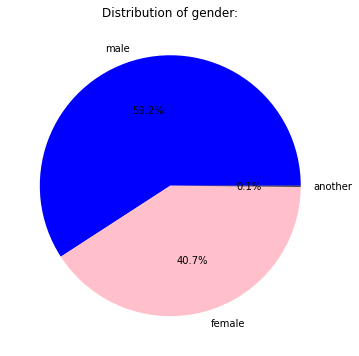

In [16]:
plt.figure(1, figsize=(6,6))
plt.title("Distribution of gender:")
new_Facebook_data['gender'].value_counts().plot.pie(autopct="%1.1f%%",colors = ['blue', 'pink','black'])
plt.ylabel("")
plt.show()

You can see that the "other" category is a very small part of the population so they will have little effect on our data analysis, so we will remove them from the data.

In [17]:
new_Facebook_data = new_Facebook_data.loc[new_Facebook_data.gender != 'another']

In [18]:
new_Facebook_data.loc[new_Facebook_data.gender == 'another']

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_per_year


- How many friend_count?

In [19]:
new_Facebook_data['friend_count'].sum()

17545186

In [20]:
new_Facebook_data.groupby('gender')[['friend_count','friendships_initiated']].sum().reset_index()

,gender,friend_count,friendships_initiated
0,female,8966245,4290632
1,male,8578941,5433924


#### Conclusion 1:

- Average comparison by age group versus number of members and number of membership requests that the user initiated himself

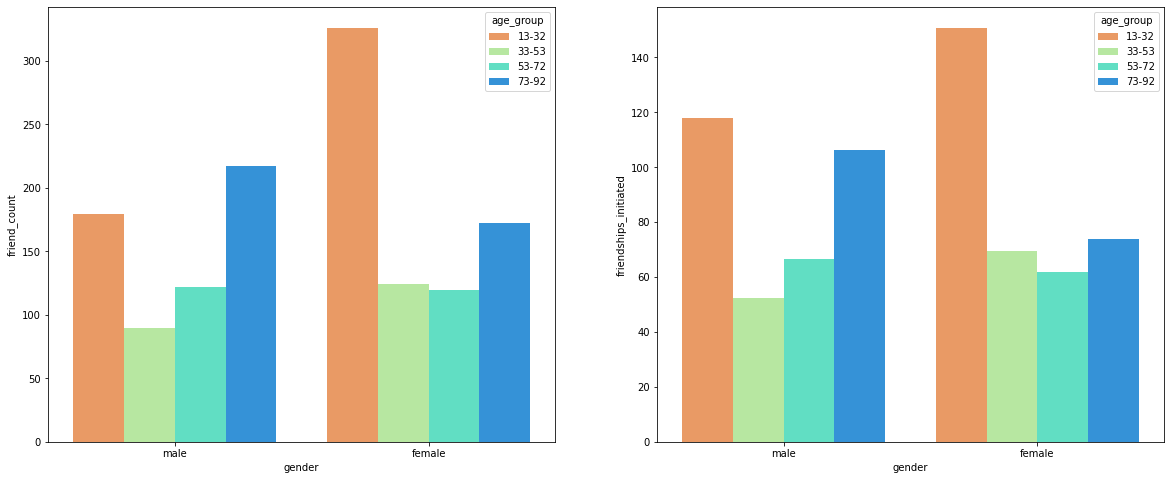

In [21]:
fig, axes = plt.subplots(figsize=(20,8), ncols=2)
sns.barplot(x = 'gender', y = 'friend_count', hue = 'age_group', data =new_Facebook_data ,palette = 'rainbow_r', order = ['male', 'female'], ci = None, ax = axes[0]);
sns.barplot(x = 'gender', y = 'friendships_initiated', hue = 'age_group', data =new_Facebook_data ,palette = 'rainbow_r', order = ['male', 'female'], ci = None ,ax = axes[1]);

in the pie chart we have seen that there are more male users than female. We would think that men are more enterprising than women in everyday life and especially on Facebook, but from the two graphs you can see the exact opposite. We've accepted that women initiate more offers of friendship than men, so they probably have more friends. In addition, it can be seen from the graph that the age at which there is more number of members is 13-32, so when we want to advertise a product or anything else, we prefer to contact the women community aged 13-32 because there will be more exposure for advertising.

#### Conclusion 2: correlations

In [22]:
from IPython.core.display import Image
Image(url="https://github.com/GitalLizaMoriyaTzlil/Facebook_Data/raw/main/smartphone-with-social-media-ui-phone-template-interaction-people-through-social-networks-social-network-user-interface-with-new-likes-comments-followers-vector-illustration-3d-style_4519.webp", width=1000,height=300)

In [23]:
new_Facebook_data.groupby('gender')[['friend_count','friendships_initiated','likes', 'likes_received']].sum().reset_index()

,gender,friend_count,friendships_initiated,likes,likes_received
0,female,8966245,4290632,10125718,9824409
1,male,8578941,5433924,4580532,3651241


Correlation test between likes I've made and likes I've received:

<AxesSubplot:>

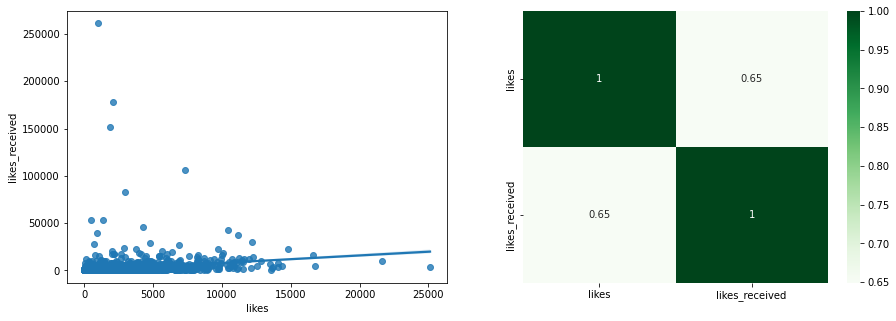

In [24]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.regplot(data = new_Facebook_data, x = 'likes', y = 'likes_received',ax=axes[0])
correlation_matrix = new_Facebook_data[['likes', 'likes_received']].corr(method='kendall')
sns.heatmap(data=correlation_matrix,cmap='Greens', annot=True, ax=axes[1])

You can see by heatmap and regression model that there's a relatively strong correlation between the number of likes a user has made and likes a user has received. 
From this it can be assumed that a user likes another user according to the likes they have made to him and vice versa. You could even say it's about ego games between users.

We'll see now if there's a connection between the likes a user made and the likes they received based on gender:

<AxesSubplot:ylabel='gender-None'>

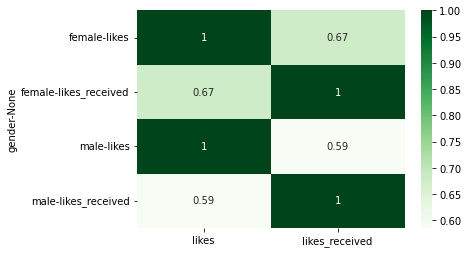

In [25]:
corr_gender = new_Facebook_data.groupby('gender')[['likes', 'likes_received']].corr(method = 'kendall')
sns.heatmap(data=corr_gender,cmap='Greens', annot=True)

You can see that in men the correlation is weaker. 
We can conclude that on men it's less influential. They're less ego-driven.

Let's now look at the likes a user received against the memberships he initiated:

<AxesSubplot:>

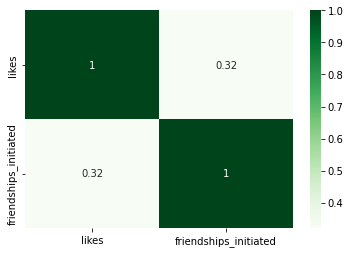

In [26]:
correlation_matrix = new_Facebook_data[['likes', 'friendships_initiated']].corr(method='kendall')
sns.heatmap(data=correlation_matrix,cmap='Greens', annot=True)

We would expect to see a relatively strong correlation
Because once you initiate friendships, you increase the exposure to your posts. But we got the exact opposite. 
We can conclude that just because you initiate friendships doesn't necessarily mean you get more likes.

In [27]:
Image(url= "https://github.com/GitalLizaMoriyaTzlil/Facebook_Data/raw/main/facebook-mobile-smartphone-ss-1920.webp", width=900,height=300)

#### Conclusion 3:

- Checking Facebook usage from phone vs computer:

In [28]:
new_Facebook_data['total_mobile_likes'] = new_Facebook_data[['mobile_likes', 'mobile_likes_received']].sum(axis=1)
new_Facebook_data['total_www_likes'] = new_Facebook_data[['www_likes', 'www_likes_received']].sum(axis=1)

In [29]:
new_Facebook_data['total_mobile_likes'].sum()

17962292

In [30]:
new_Facebook_data['total_www_likes'].sum()

10219599

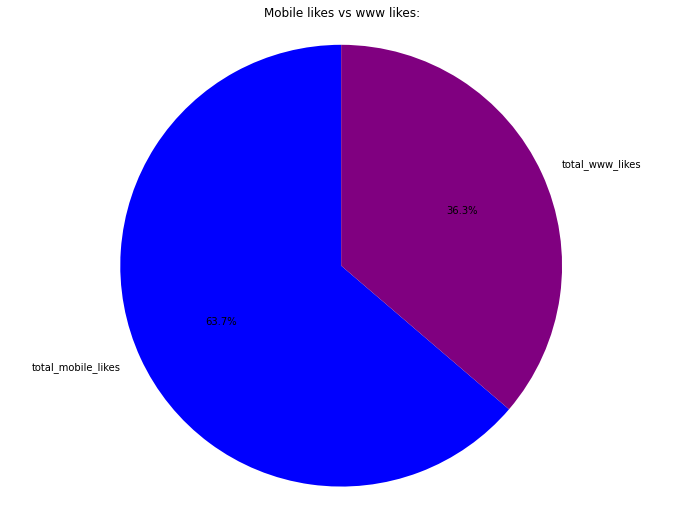

In [31]:
labels = 'total_mobile_likes', 'total_www_likes'
sizes = [17962292, 10219599]
fig1, ax1 = plt.subplots(1, figsize=(12,9))
plt.title("Mobile likes vs www likes:")
ax1.pie(sizes, labels=labels , autopct='%1.1f%%',startangle=90,colors = ['blue', 'Purple'])
ax1.axis('equal')  
plt.show()

It can be seen that using a phone is bigger than using a computer. it was obvious and did not give us any innovation or conclusion.

We'll check for each user what age they opened Facebook:

In [32]:
new_Facebook_data['years_of_use'] = new_Facebook_data[['tenure']].apply(lambda x: x/365 )
new_Facebook_data.years_of_use=new_Facebook_data.years_of_use.astype('int')
new_Facebook_data['sing_up_age'] = new_Facebook_data['age'] - new_Facebook_data['years_of_use']

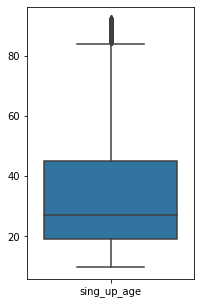

In [33]:
plt.figure(figsize=(3,5))
sns.boxplot(data = new_Facebook_data[['sing_up_age']]);

In [34]:
new_Facebook_data['sing_up_age'].mean()

32.951684199341194

In [35]:
new_Facebook_data['sing_up_age'].median()

27.0

According to the chart, it can be seen that the median age at which you sign up for Facebook is in the age range of 27.
It can be seen that there are quite a few exceptions in relation to the median age of the registrants
In our hypothesis, these exceptions may indeed be people of the age in question,
Or young children who have not reached the age where you can sign up for Facebook and fake a year of birth so they can sign up. 
 
According to an examination we conducted the facebook registration in 2013 and even now it is possible from the age of 13 
https://www.facebook.com/help/157793540954833